In [49]:
# new jupyter project notebook file
# Dependencies
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random

In [50]:
#import data file
data_file = Path("Resources/diabetes_binary_health_indicators_BRFSS2015.csv")

In [51]:
#look at datafile
data_file_df = pd.read_csv(data_file)
data_file_df.head(10)

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
5,0.0,1.0,1.0,1.0,25.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,2.0,0.0,1.0,10.0,6.0,8.0
6,0.0,1.0,0.0,1.0,30.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,3.0,0.0,14.0,0.0,0.0,9.0,6.0,7.0
7,0.0,1.0,1.0,1.0,25.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,0.0,0.0,1.0,0.0,11.0,4.0,4.0
8,1.0,1.0,1.0,1.0,30.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,5.0,30.0,30.0,1.0,0.0,9.0,5.0,1.0
9,0.0,0.0,0.0,1.0,24.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,2.0,0.0,0.0,0.0,1.0,8.0,4.0,3.0


In [52]:
#To check for the Duplicate value
duplicate_values = data_file_df.duplicated().sum()
duplicate_values
#duplicate values was 24206
len(data_file_df)
#total count =253680


253680

In [53]:
# To remove the duplicated values
data_file_df.drop_duplicates(inplace = True)
len(data_file_df)

229474

In [54]:
#show datatypes
data_file_df.dtypes

Diabetes_binary         float64
HighBP                  float64
HighChol                float64
CholCheck               float64
BMI                     float64
Smoker                  float64
Stroke                  float64
HeartDiseaseorAttack    float64
PhysActivity            float64
Fruits                  float64
Veggies                 float64
HvyAlcoholConsump       float64
AnyHealthcare           float64
NoDocbcCost             float64
GenHlth                 float64
MentHlth                float64
PhysHlth                float64
DiffWalk                float64
Sex                     float64
Age                     float64
Education               float64
Income                  float64
dtype: object

In [55]:
#show subset of columns to analyse
diabetes_age_sex_bmi = data_file_df[["Diabetes_binary", "BMI","Sex","Age"]]
diabetes_age_sex_bmi.head(10)

,Diabetes_binary,BMI,Sex,Age
0,0.0,40.0,0.0,9.0
1,0.0,25.0,0.0,7.0
2,0.0,28.0,0.0,9.0
3,0.0,27.0,0.0,11.0
4,0.0,24.0,0.0,11.0
5,0.0,25.0,1.0,10.0
6,0.0,30.0,0.0,9.0
7,0.0,25.0,0.0,11.0
8,1.0,30.0,0.0,9.0
9,0.0,24.0,1.0,8.0


In [56]:
#GROUP BMI into buckets

df1=diabetes_age_sex_bmi
#set range for BMI
bins = [0,18,25,30,100]
#name the ranges
group_names=['Underweight','Healthy','Overweight','Obese']
#new column
df1['BMI_GROUP']=pd.cut(diabetes_age_sex_bmi['BMI'],bins,labels=group_names)

df1.head(10)

C:\Users\michaelz\AppData\Local\Temp\ipykernel_52544\2164732836.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['BMI_GROUP']=pd.cut(diabetes_age_sex_bmi['BMI'],bins,labels=group_names)


,Diabetes_binary,BMI,Sex,Age,BMI_GROUP
0,0.0,40.0,0.0,9.0,Obese
1,0.0,25.0,0.0,7.0,Healthy
2,0.0,28.0,0.0,9.0,Overweight
3,0.0,27.0,0.0,11.0,Overweight
4,0.0,24.0,0.0,11.0,Healthy
5,0.0,25.0,1.0,10.0,Healthy
6,0.0,30.0,0.0,9.0,Overweight
7,0.0,25.0,0.0,11.0,Healthy
8,1.0,30.0,0.0,9.0,Overweight
9,0.0,24.0,1.0,8.0,Healthy


In [57]:
#GROUP Age into buckets

df2=df1

#set range for Age
bins = [0,1,2,3,4,5,6,7,8,9,10,11,12,13]
#name the ranges
group_names=['18-24','25-29','30-34','35-39','40-44','45-49','50-54','55-59','60-64','65-69','70-74','75-79','80+']
#new column
df1['Age_GROUP']=pd.cut(df1['Age'],bins,labels=group_names)

df2.head(10)

C:\Users\michaelz\AppData\Local\Temp\ipykernel_52544\4108418551.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Age_GROUP']=pd.cut(df1['Age'],bins,labels=group_names)


,Diabetes_binary,BMI,Sex,Age,BMI_GROUP,Age_GROUP
0,0.0,40.0,0.0,9.0,Obese,60-64
1,0.0,25.0,0.0,7.0,Healthy,50-54
2,0.0,28.0,0.0,9.0,Overweight,60-64
3,0.0,27.0,0.0,11.0,Overweight,70-74
4,0.0,24.0,0.0,11.0,Healthy,70-74
5,0.0,25.0,1.0,10.0,Healthy,65-69
6,0.0,30.0,0.0,9.0,Overweight,60-64
7,0.0,25.0,0.0,11.0,Healthy,70-74
8,1.0,30.0,0.0,9.0,Overweight,60-64
9,0.0,24.0,1.0,8.0,Healthy,55-59


In [58]:
#set bmi_group as index
# df_bmi = df2.set_index("BMI_GROUP")
df_bmi = df2.reindex()
df_bmi.head()

,Diabetes_binary,BMI,Sex,Age,BMI_GROUP,Age_GROUP
0,0.0,40.0,0.0,9.0,Obese,60-64
1,0.0,25.0,0.0,7.0,Healthy,50-54
2,0.0,28.0,0.0,9.0,Overweight,60-64
3,0.0,27.0,0.0,11.0,Overweight,70-74
4,0.0,24.0,0.0,11.0,Healthy,70-74


In [123]:
#format to age by diabetes
df_bmi_plot = df_bmi.loc[:, ["Age_GROUP", "BMI_GROUP","Diabetes_binary"]]
df_bmi_plot

,Age_GROUP,BMI_GROUP,Diabetes_binary
0,60-64,Obese,0.0
1,50-54,Healthy,0.0
2,60-64,Overweight,0.0
3,70-74,Overweight,0.0
4,70-74,Healthy,0.0
...,...,...,...
253675,40-44,Obese,0.0
253676,70-74,Underweight,1.0
253677,25-29,Overweight,0.0
253678,50-54,Healthy,0.0


In [140]:
# df_bmi_plot_diabetics = df_bmi.loc[df_bmi['Diabetes_binary'] == 1]
# df_bmi_plot_ = df_bmi.loc[:, ["Age_GROUP", "BMI_GROUP","Diabetes_binary"]].head(100)
df_bmi_plot_diabetics = df_bmi_plot.loc[:, ["Age_GROUP","BMI_GROUP","Diabetes_binary"]]
df_bmi_plot_diabetics

,Age_GROUP,BMI_GROUP,Diabetes_binary
0,60-64,Obese,0.0
1,50-54,Healthy,0.0
2,60-64,Overweight,0.0
3,70-74,Overweight,0.0
4,70-74,Healthy,0.0
...,...,...,...
253675,40-44,Obese,0.0
253676,70-74,Underweight,1.0
253677,25-29,Overweight,0.0
253678,50-54,Healthy,0.0


In [141]:
#filter with BMI_GROUP not healthy and diabetic
df_bmi_age_plot_diabetics = df_bmi_plot_diabetics.loc[df_bmi['BMI_GROUP'] != 'Healthy']
df_bmi_age_plot_diabetics

,Age_GROUP,BMI_GROUP,Diabetes_binary
0,60-64,Obese,0.0
2,60-64,Overweight,0.0
3,70-74,Overweight,0.0
6,60-64,Overweight,0.0
8,60-64,Overweight,1.0
...,...,...,...
253673,30-34,Obese,0.0
253674,30-34,Overweight,0.0
253675,40-44,Obese,0.0
253676,70-74,Underweight,1.0


In [142]:
print(df_bmi_age_plot_diabetics['BMI_GROUP'].unique())

['Obese', 'Overweight', 'Underweight']
Categories (4, object): ['Underweight' < 'Healthy' < 'Overweight' < 'Obese']


In [143]:
df_bmi_age_plot_diabetics = pd.DataFrame(df_bmi_age_plot_diabetics)
df_bmi_age_plot_diabetics

,Age_GROUP,BMI_GROUP,Diabetes_binary
0,60-64,Obese,0.0
2,60-64,Overweight,0.0
3,70-74,Overweight,0.0
6,60-64,Overweight,0.0
8,60-64,Overweight,1.0
...,...,...,...
253673,30-34,Obese,0.0
253674,30-34,Overweight,0.0
253675,40-44,Obese,0.0
253676,70-74,Underweight,1.0


In [144]:
#filter with BMI_GROUP not healthy and diabetic only
df_bmi_age_plot_diabetics = df_bmi_plot_diabetics.loc[df_bmi['Diabetes_binary'] == 1]
df_bmi_age_plot_diabetics

,Age_GROUP,BMI_GROUP,Diabetes_binary
8,60-64,Overweight,1.0
10,80+,Healthy,1.0
13,70-74,Overweight,1.0
17,50-54,Healthy,1.0
23,80+,Overweight,1.0
...,...,...,...
253659,45-49,Obese,1.0
253668,65-69,Overweight,1.0
253670,80+,Healthy,1.0
253676,70-74,Underweight,1.0


In [173]:
#drop column
df_bmi_age_plot_diabetics.drop('BMI_GROUP', axis=1, inplace=True)

C:\Users\michaelz\AppData\Local\Temp\ipykernel_52544\3167721565.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bmi_age_plot_diabetics.drop('BMI_GROUP', axis=1, inplace=True)


In [180]:

diabetics_by_age_diabetics = df_bmi_age_plot_diabetics.groupby('Age_GROUP')
diabetics_by_age_diabetics

In [186]:
grouped_sum = diabetics_by_age_diabetics.sum()

In [187]:
grouped_sum = grouped_sum.reset_index()

In [188]:
# Display the resulting DataFrame with the reset index
print(grouped_sum)

   Age_GROUP  Diabetes_binary
0      18-24             78.0
1      25-29            140.0
2      30-34            314.0
3      35-39            625.0
4      40-44           1049.0
5      45-49           1741.0
6      50-54           3072.0
7      55-59           4241.0
8      60-64           5681.0
9      65-69           6483.0
10     70-74           5090.0
11     75-79           3383.0
12       80+           3200.0


<Axes: xlabel='Age_GROUP'>

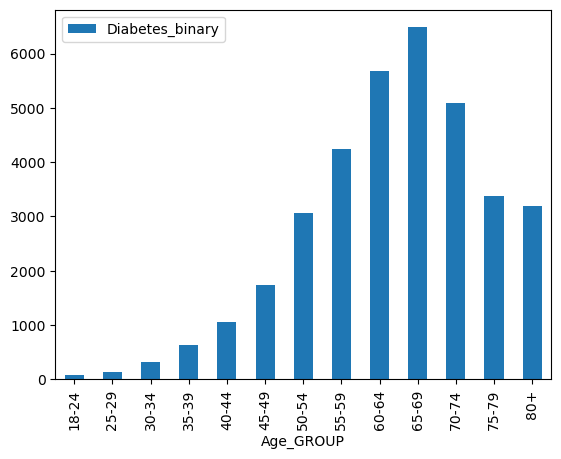

In [194]:
grouped_sum.plot(kind='bar', x='Age_GROUP', y='Diabetes_binary')

In [189]:
#save to cleaned csv
filepath = Path('Resources/cleaned_age_by_bmi_diabetics.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
df_bmi_age_plot_diabetics.to_csv(filepath)

In [200]:
# same for people without
df_bmi_plot.head(100)

,Age_GROUP,BMI_GROUP,Diabetes_binary
0,60-64,Obese,0.0
1,50-54,Healthy,0.0
2,60-64,Overweight,0.0
3,70-74,Overweight,0.0
4,70-74,Healthy,0.0
...,...,...,...
95,60-64,Healthy,1.0
96,30-34,Obese,1.0
97,60-64,Obese,0.0
98,70-74,Overweight,0.0


In [201]:
df_bmi_age_plot_non_diabetics = df_bmi_plot.loc[df_bmi['BMI_GROUP'] != 'Healthy']
df_bmi_age_plot_non_diabetics

,Age_GROUP,BMI_GROUP,Diabetes_binary
0,60-64,Obese,0.0
2,60-64,Overweight,0.0
3,70-74,Overweight,0.0
6,60-64,Overweight,0.0
8,60-64,Overweight,1.0
...,...,...,...
253673,30-34,Obese,0.0
253674,30-34,Overweight,0.0
253675,40-44,Obese,0.0
253676,70-74,Underweight,1.0


In [202]:
#filter with BMI_GROUP not healthy and diabetic only
df_bmi_age_plot_non_diabetics = df_bmi_age_plot_non_diabetics.loc[df_bmi['Diabetes_binary'] == 0]
df_bmi_age_plot_non_diabetics

,Age_GROUP,BMI_GROUP,Diabetes_binary
0,60-64,Obese,0.0
2,60-64,Overweight,0.0
3,70-74,Overweight,0.0
6,60-64,Overweight,0.0
11,65-69,Obese,0.0
...,...,...,...
253672,75-79,Overweight,0.0
253673,30-34,Obese,0.0
253674,30-34,Overweight,0.0
253675,40-44,Obese,0.0


In [203]:
df_bmi_age_plot_non_diabetics.drop('BMI_GROUP', axis=1, inplace=True)

C:\Users\michaelz\AppData\Local\Temp\ipykernel_52544\1526930865.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bmi_age_plot_non_diabetics.drop('BMI_GROUP', axis=1, inplace=True)


In [204]:
diabetics_by_age_non_diabetics = df_bmi_age_plot_non_diabetics.groupby('Age_GROUP')
diabetics_by_age_non_diabetics

In [206]:
grouped_sum_nondiabetics = diabetics_by_age_non_diabetics.count()

grouped_sum_nondiabetics = grouped_sum_nondiabetics.reset_index()

print(grouped_sum_nondiabetics)

   Age_GROUP  Diabetes_binary
0      18-24             2581
1      25-29             4004
2      30-34             6170
3      35-39             7730
4      40-44             8855
5      45-49            10812
6      50-54            13830
7      55-59            15730
8      60-64            16109
9      65-69            15108
10     70-74            10909
11     75-79             7285
12       80+             6969


<Axes: xlabel='Age_GROUP'>

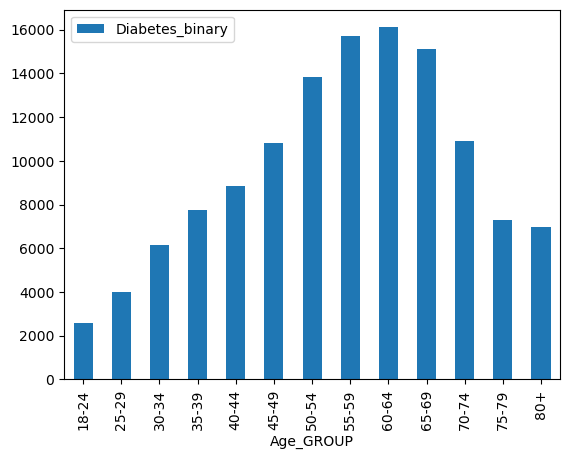

In [240]:
grouped_sum_nondiabetics.plot(kind='bar', x='Age_GROUP', y='Diabetes_binary')

In [242]:
filepath = Path('Resources/diabetics_bmi_age.png')
grouped_sum_nondiabetics.savefig(filepath)

AttributeError: 'DataFrame' object has no attribute 'savefig'

In [228]:
nondiabetics_pd = pd.DataFrame(grouped_sum_nondiabetics)

In [229]:
nondiabetics_pd = nondiabetics_pd.rename(columns={'Diabetes_binary': 'Diabetics'})

In [230]:
diabetics_pd = pd.DataFrame(grouped_sum)

In [231]:
diabetics_pd = diabetics_pd.rename(columns={'Diabetes_binary': 'Non-Diabetics'})

In [232]:
nondiabetics_pd.head(100)

,Age_GROUP,Diabetics
0,18-24,2581
1,25-29,4004
2,30-34,6170
3,35-39,7730
4,40-44,8855
5,45-49,10812
6,50-54,13830
7,55-59,15730
8,60-64,16109
9,65-69,15108


In [233]:
diabetics_pd.head(100)

,Age_GROUP,Non-Diabetics
0,18-24,78.0
1,25-29,140.0
2,30-34,314.0
3,35-39,625.0
4,40-44,1049.0
5,45-49,1741.0
6,50-54,3072.0
7,55-59,4241.0
8,60-64,5681.0
9,65-69,6483.0


In [234]:
#merge 2 to create 1 pd
merged_df = diabetics_pd.merge(nondiabetics_pd, on='Age_GROUP', how='inner')
merged_df.head(10)

,Age_GROUP,Non-Diabetics,Diabetics
0,18-24,78.0,2581
1,25-29,140.0,4004
2,30-34,314.0,6170
3,35-39,625.0,7730
4,40-44,1049.0,8855
5,45-49,1741.0,10812
6,50-54,3072.0,13830
7,55-59,4241.0,15730
8,60-64,5681.0,16109
9,65-69,6483.0,15108


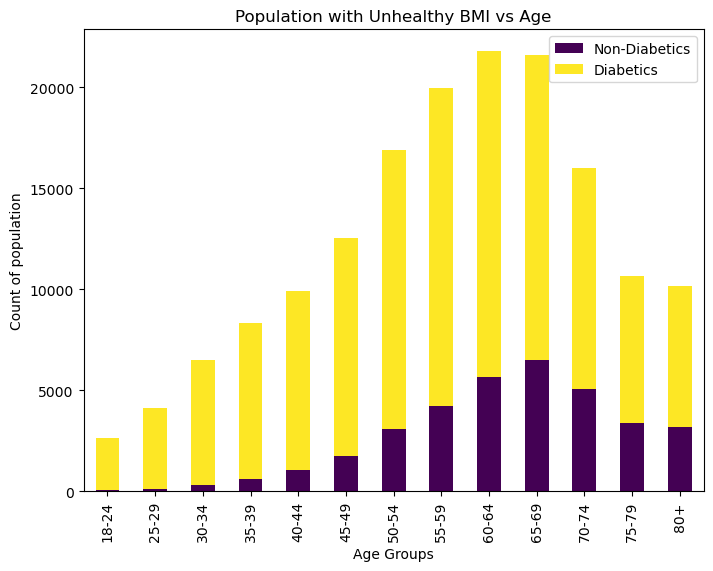

In [236]:
# Group the data by the 'common_column' and sum the values in 'data1_column' and 'data2_column'
grouped_df = merged_df.groupby('Age_GROUP').sum()

# Create a stacked bar plot
ax = grouped_df.plot(kind='bar', stacked=True, colormap='viridis', figsize=(8, 6))

# Add labels and title
plt.xlabel('Age Groups')
plt.ylabel('Count of population')
plt.title('Population with Unhealthy BMI vs Age')

# Show the plot
plt.show()

In [237]:
#save to cleaned csv
filepath = Path('Resources/merged_age_by_bmi.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
merged_df.to_csv(filepath)

In [226]:
#Males(1) and Females(0) with physical health or injury (1-30days)
#show subset of columns to analyse
diabetes_sex_health = data_file_df[["Diabetes_binary","Sex","PhysHlth"]]
diabetes_sex_health.head(10)

,Diabetes_binary,Sex,PhysHlth
0,0.0,0.0,15.0
1,0.0,0.0,0.0
2,0.0,0.0,30.0
3,0.0,0.0,0.0
4,0.0,0.0,0.0
5,0.0,1.0,2.0
6,0.0,0.0,14.0
7,0.0,0.0,0.0
8,1.0,0.0,30.0
9,0.0,1.0,0.0


In [246]:
#create array of Males with and without diabetes
#Males
diabetes_male_diabetics = diabetes_sex_health.loc[(diabetes_sex_health['Sex'] == 1) & (diabetes_sex_health['PhysHlth'] != 0)]

diabetes_male_diabetics = diabetes_male_diabetics.groupby('Diabetes_binary')

diabetes_male_count = diabetes_male_diabetics['Diabetes_binary'].count()
diabetes_male_count

Diabetes_binary
0.0    28848
1.0     8003
Name: Diabetes_binary, dtype: int64

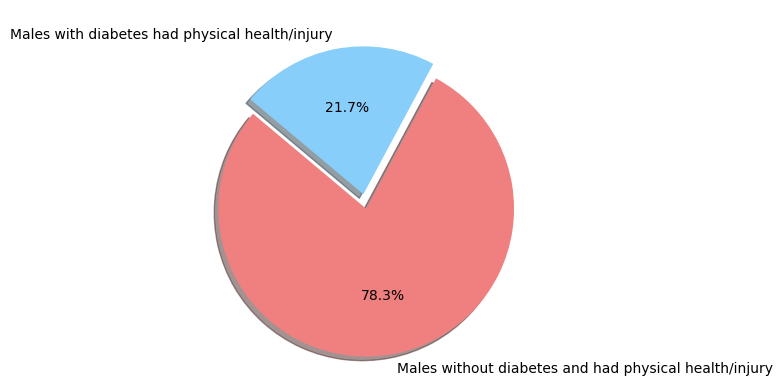

In [248]:
#pie chart of male with/out diabetes
# Labels for the sections of our pie chart
labels = ["Males without diabetes and had physical health/injury", "Males with diabetes had physical health/injury"]

# The values of each section of the pie chart
sizes = [28848,8003]

# The colours of each section of the pie chart
colours = ["lightcoral", "lightskyblue"]

# Tells matplotlib to separate the "Humans" section from the others
explode = (0.1, 0)
plt.pie(sizes, explode=explode, labels=labels, colors=colours,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.show()

In [235]:
#create array of females with and without diabetes
#Females
diabetes_female_diabetics = diabetes_sex_health.loc[(diabetes_sex_health['Sex'] == 0) & (diabetes_sex_health['PhysHlth'] != 0)]

diabetes_female_diabetics = diabetes_female_diabetics.groupby('Diabetes_binary')

diabetes_female_diabetics = diabetes_female_diabetics['Diabetes_binary'].count()
diabetes_female_diabetics

Diabetes_binary
0.0    110370
1.0     18345
Name: Diabetes_binary, dtype: int64

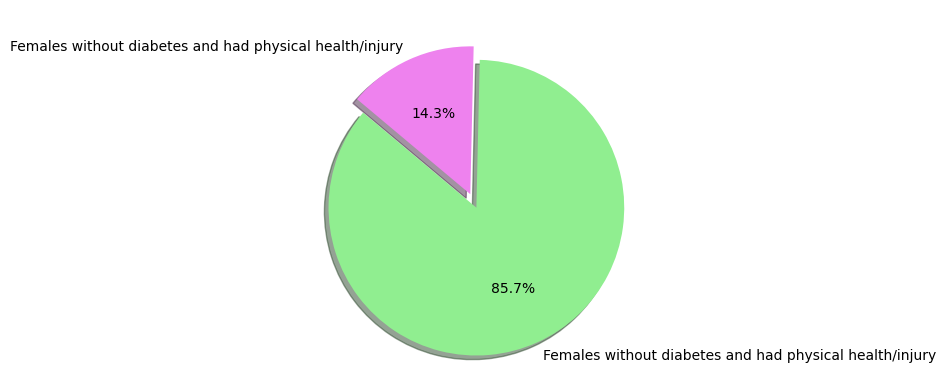

In [250]:
#pie chart of female with/out diabetes
# Labels for the sections of our pie chart
labels = ["Females without diabetes and had physical health/injury", "Females without diabetes and had physical health/injury"]

# The values of each section of the pie chart
sizes = [110370,18345]

# The colours of each section of the pie chart
colours = ["lightgreen", "violet"]

# Tells matplotlib to separate the "Humans" section from the others
explode = (0.1, 0)
plt.pie(sizes, explode=explode, labels=labels, colors=colours,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.show()

In [244]:
#show subset of columns to analyse
diabetes_gen_health = data_file_df[["Diabetes_binary","GenHlth","AnyHealthcare"]]
diabetes_gen_health.head(10)

,Diabetes_binary,GenHlth,AnyHealthcare
0,0.0,5.0,1.0
1,0.0,3.0,0.0
2,0.0,5.0,1.0
3,0.0,2.0,1.0
4,0.0,2.0,1.0
5,0.0,2.0,1.0
6,0.0,3.0,1.0
7,0.0,3.0,1.0
8,1.0,5.0,1.0
9,0.0,2.0,1.0


In [246]:
#subset diabetics with no healthcare with genhealth
diabetes_gen_health_diabetes = diabetes_gen_health.loc[(diabetes_gen_health['AnyHealthcare'] == 0) & (diabetes_gen_health['Diabetes_binary'] == 1)]
diabetes_gen_health_diabetes

,Diabetes_binary,GenHlth,AnyHealthcare
96,1.0,4.0,0.0
150,1.0,4.0,0.0
406,1.0,4.0,0.0
417,1.0,3.0,0.0
452,1.0,3.0,0.0
...,...,...,...
252137,1.0,4.0,0.0
252171,1.0,4.0,0.0
252364,1.0,4.0,0.0
252452,1.0,3.0,0.0


<Axes: title={'center': 'Diabetics with no Healthcare - physical score'}>

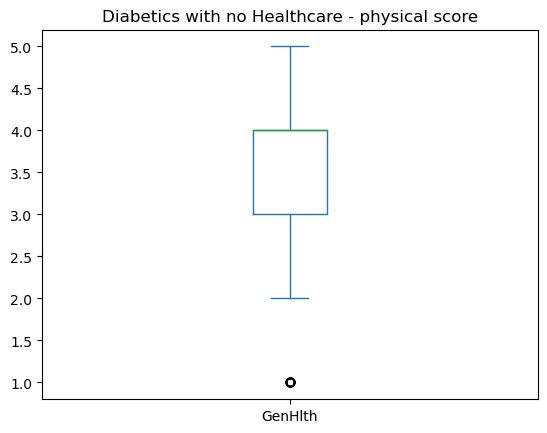

In [248]:
diabetes_gen_health_diabetes['GenHlth'].plot(kind='box', title='Diabetics with no Healthcare - physical score')

In [249]:
#subset diabetics with no healthcare with genhealth
diabetes_gen_health_diabetes2 = diabetes_gen_health.loc[(diabetes_gen_health['AnyHealthcare'] == 1) & (diabetes_gen_health['Diabetes_binary'] == 1)]
diabetes_gen_health_diabetes2

,Diabetes_binary,GenHlth,AnyHealthcare
8,1.0,5.0,1.0
10,1.0,3.0,1.0
13,1.0,4.0,1.0
17,1.0,2.0,1.0
23,1.0,1.0,1.0
...,...,...,...
253659,1.0,4.0,1.0
253668,1.0,2.0,1.0
253670,1.0,5.0,1.0
253676,1.0,4.0,1.0


<Axes: title={'center': 'Diabetics with Healthcare - physical score'}>

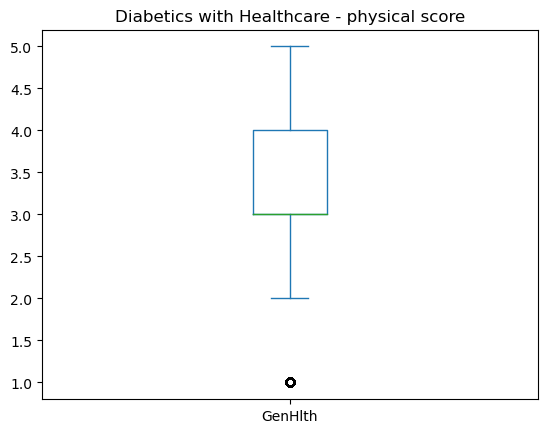

In [250]:
diabetes_gen_health_diabetes2['GenHlth'].plot(kind='box', title='Diabetics with Healthcare - physical score')

In [251]:
#subset non diabetics with no healthcare with genhealth
diabetes_gen_health_diabetes3 = diabetes_gen_health.loc[(diabetes_gen_health['AnyHealthcare'] == 0) & (diabetes_gen_health['Diabetes_binary'] == 0)]
diabetes_gen_health_diabetes3

,Diabetes_binary,GenHlth,AnyHealthcare
1,0.0,3.0,0.0
31,0.0,1.0,0.0
38,0.0,1.0,0.0
45,0.0,3.0,0.0
46,0.0,2.0,0.0
...,...,...,...
253526,0.0,1.0,0.0
253545,0.0,1.0,0.0
253575,0.0,1.0,0.0
253607,0.0,1.0,0.0


<Axes: title={'center': 'Non-Diabetics with no Healthcare - physical score'}>

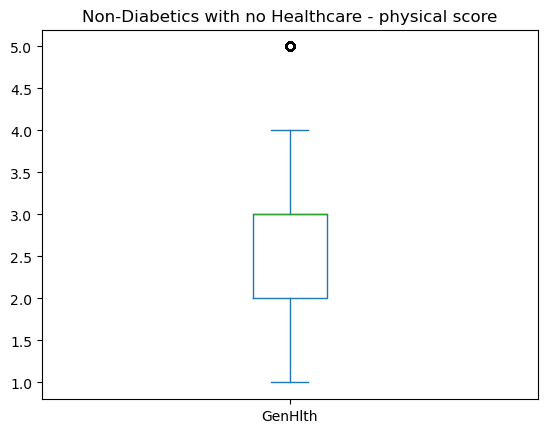

In [252]:
diabetes_gen_health_diabetes3['GenHlth'].plot(kind='box', title='Non-Diabetics with no Healthcare - physical score')

In [253]:
#subset non diabetics with healthcare with genhealth
diabetes_gen_health_diabetes4 = diabetes_gen_health.loc[(diabetes_gen_health['AnyHealthcare'] == 1) & (diabetes_gen_health['Diabetes_binary'] == 1)]
diabetes_gen_health_diabetes4

,Diabetes_binary,GenHlth,AnyHealthcare
8,1.0,5.0,1.0
10,1.0,3.0,1.0
13,1.0,4.0,1.0
17,1.0,2.0,1.0
23,1.0,1.0,1.0
...,...,...,...
253659,1.0,4.0,1.0
253668,1.0,2.0,1.0
253670,1.0,5.0,1.0
253676,1.0,4.0,1.0


<Axes: title={'center': 'Non-Diabetics with Healthcare - physical score'}>

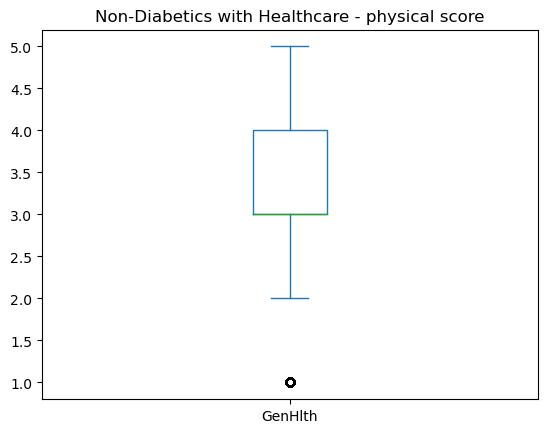

In [254]:
diabetes_gen_health_diabetes4['GenHlth'].plot(kind='box', title='Non-Diabetics with Healthcare - physical score')